   year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01
5  2003  Acre  Janeiro    10.0  2003-01-01
6  2004  Acre  Janeiro     0.0  2004-01-01
7  2005  Acre  Janeiro    12.0  2005-01-01
8  2006  Acre  Janeiro     4.0  2006-01-01
9  2007  Acre  Janeiro     0.0  2007-01-01
      year      state     month  number        date
6444  2007  Tocantins  Dezembro    13.0  2007-01-01
6445  2008  Tocantins  Dezembro     7.0  2008-01-01
6446  2009  Tocantins  Dezembro    46.0  2009-01-01
6447  2010  Tocantins  Dezembro    72.0  2010-01-01
6448  2011  Tocantins  Dezembro   105.0  2011-01-01
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2

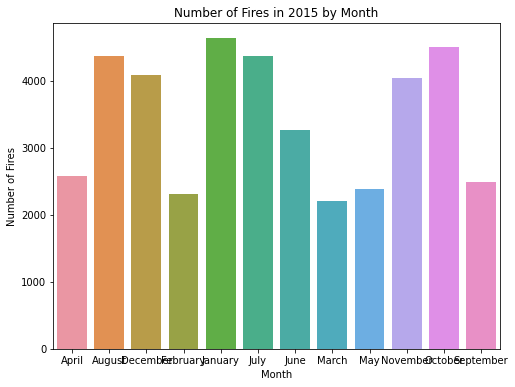

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64
['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantin

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/charn/OneDrive/amazon.csv", encoding='latin1')

# 1. Display top 10 rows of the dataset.
print(df.head(10))

# 2. Check last 10 rows.
print(df.tail(10))

# 3. Find shape of the dataset (number of rows and number of columns).
print(df.shape)

# 4. Get information about the dataset like total number rows, total number of columns, datatypes of each column and memory requirement.
print(df.info())

# 5. Check for duplicate data and drop them.
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 6. Check null values in the dataset.
print(df.isnull().sum())

# 7. Get overall statistics about the dataframe.
print(df.describe())

# 8. Rename month names to English.
month_dict = {'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
              'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
              'Novembro': 'November', 'Dezembro': 'December'}
df['month'] = df['month'].map(month_dict)

# 9. Get the total number of fires registered.
print(df['number'].sum())

# 10. In which month maximum number of forest fires were reported?
print(df.groupby('month')['number'].sum().sort_values(ascending=False).index[0])

# 11. In which year maximum number of forest fires was reported?
print(df.groupby('year')['number'].sum().sort_values(ascending=False).index[0])

# 12. In which state maximum number of forest fires was reported?
print(df.groupby('state')['number'].sum().sort_values(ascending=False).index[0])

# 13. Find total number of fires were reported in Amazonas.
print(df.loc[df['state'] == 'Amazonas']['number'].sum())

# 14. Display number of fires were reported in Amazonas (year-wise).
print(df.loc[df['state'] == 'Amazonas'].groupby('year')['number'].sum())

# 15. Display number of fires were reported in Amazonas (day-wise).
print(df.loc[df['state'] == 'Amazonas'].groupby('date')['number'].sum())

# 16. Find total number of fires were reported in 2015 and visualize data based on each ‘month’.
fires_2015 = df.loc[df['year'] == 2015]
print(fires_2015['number'].sum())

import matplotlib.pyplot as plt
import seaborn as sns

fires_2015_monthly = fires_2015.groupby('month')['number'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=fires_2015_monthly.index, y=fires_2015_monthly.values)
plt.title('Number of Fires in 2015 by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

# 17. Find average number of fires were reported from highest to lowest (state-wise).
fires_state_avg = df.groupby('state')['number'].mean().sort_values(ascending=False)
print(fires_state_avg)

# 18. Find the state names where fires were reported in 'dec' month.
print(df.loc[df['month'] == 'December']['state'].unique())
